# 竞争学习规则

<font size=5 color=blue face="黑体">**学习过程**</font>  

<font size=4 face="宋体"> step 1: 向量归一化 </font>  
<font size=4 face="宋体"> step 2: 寻找获胜神经元 </font>  
<font size=4 face="宋体"> step 3: 网络输出与权值调整</font>  

In [1]:
import os
import numpy as np
from nnc import dataset_git as Data
from nnc.plot_tool import draw_circ,draw_cl

In [2]:
def normalize(X):
    # X.shape = [N,M]  N-样本数目 M-特征维度
    if X.ndim <= 1:
        X = X.reshape(1,-1)
    X_ = X.T/np.linalg.norm(X,axis=1)
    return X_.T
# Winner-Take-All
def competitive(x,W):
    # x - N-维输入样本  1*N  N-输入你发粗节点数目
    # W - 权矩阵 N*M   M-竞争层神经元数目
    return np.argmax(np.dot(x,W))

# 权值更新
def update_weight(x,w,lr):
    w += lr*(x-w)
    return w

In [3]:
# 运行 权值学习
def runner_2d(X,classnum,lr=0.1,epochs=10,init_W=None,**kwargs):
    # 训练样本进行归一化
    X = normalize(X)
    N,M = X.shape
    
    draw_flag = kwargs.get('draw_flag',0)
    # 绘制样本分布图
    if draw_flag == 1 and X.shape[1] == 2:
        draw_circ([X],title='样本数据')
    # 初始化权矩阵
    if init_W is None:
        W = np.random.randn(X.shape[1],classnum)  
    else:   
        W = np.array(init_W)  
    # 权值归一化
    W = normalize(W.T).T
    W_theta = []
    W_theta.append(Data.axis2theta(W.T))
    print(f'初始权值向量: W1={W.T[0]},W2={W.T[1]}')
    
    # 绘制初始权值分布图
    if draw_flag == 1 and X.shape[1] == 2:
        draw_circ([X,W.T],title='初始权值向量分布')
    
    # 更新权值向量 （训练）
    for epoch in range(epochs): 
        i = epoch % N
        print("\nEpoch {:d}:".format(epoch+1))
        print(f'\n当前输入的训练数据 X{i+1}: ',X[i,:]) 
        # 寻找获胜神经元
        winner = competitive(X[i,:],W)
        # 更新获胜神经元的权值/并做归一化处理
        w_old = np.array(W[:,winner])               # 获胜神经元的权值
        w_ = update_weight(X[i,:],W[:,winner],lr)   # 获胜神经元的权值更新
        W[:,winner] = normalize(w_)                 # 获胜神经元的新权值归一化
        print(f'\n第{winner+1}个神经元获胜，更新权向量 W{winner+1}:',W[:,winner])
        wtheta = Data.axis2theta(W.T)
        print('\n权向量角度: W1({:.2f}),W2({:.2f})'.format(wtheta[0],wtheta[1]))
        W_theta.append(list(wtheta))
        
        # 绘制更新后的权值分布图
        if draw_flag == 1 and X.shape[1] == 2:
            #draw_circ([X,W.T],title=f'第{epoch+1}次更新')
            draw_cl([X,W.T],index=i,winner=[winner,w_old],title=f'第{epoch+1}次更新')
            
    return W,np.array(W_theta)

<font size=4 color=blue>**例4-1**  </font> <font size=4 face="宋体"> 使用竞争学习算法将下列模式分为二类.</font>

<font size=3>   $$
\boldsymbol{X}^1 = \begin{pmatrix} 0.8 \\ 0.6 \end{pmatrix},\ 
\boldsymbol{X}^2 = \begin{pmatrix} 0.1736 \\ -0.9848 \end{pmatrix},\ 
\boldsymbol{X}^3 = \begin{pmatrix} 0.707 \\ 0.707 \end{pmatrix},\ 
\boldsymbol{X}^4 = \begin{pmatrix} 0.342 \\ -0.9397 \end{pmatrix},\ 
\boldsymbol{X}^5 = \begin{pmatrix} 0.6 \\ 0.8 \end{pmatrix}
$$ </font>

<font size=4 face="宋体">     竞争层设两个权向量，随机初始化为单位向量, 学习率 $\eta = 0.5$</font>

<font size=3>  $$\boldsymbol{W}_1(0) = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = 0^\circ,\ 
\boldsymbol{W}_2(0) = \begin{pmatrix} -1 \\ 0 \end{pmatrix} = 180^\circ$$</font>

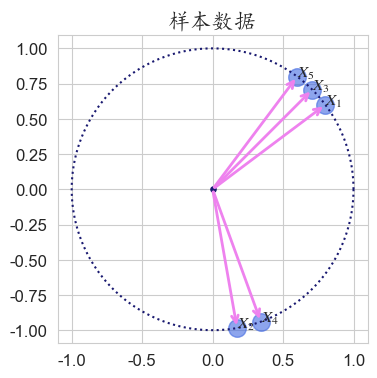

初始权值向量: W1=[1. 0.],W2=[-1.  0.]


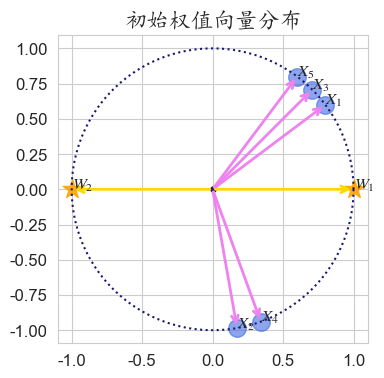


Epoch 1:

当前输入的训练数据 X1:  [0.8 0.6]

第1个神经元获胜，更新权向量 W1: [0.9486833  0.31622777]

权向量角度: W1(18.43),W2(180.00)


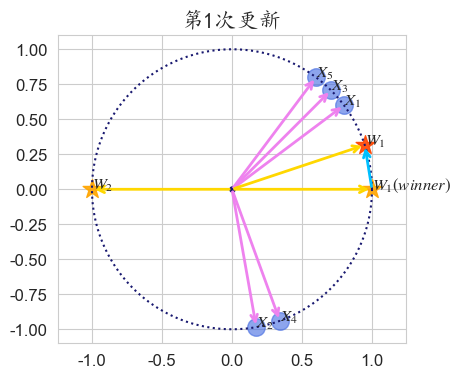


Epoch 2:

当前输入的训练数据 X2:  [ 0.17360278 -0.98481576]

第1个神经元获胜，更新权向量 W1: [ 0.85910423 -0.51180067]

权向量角度: W1(-30.78),W2(180.00)


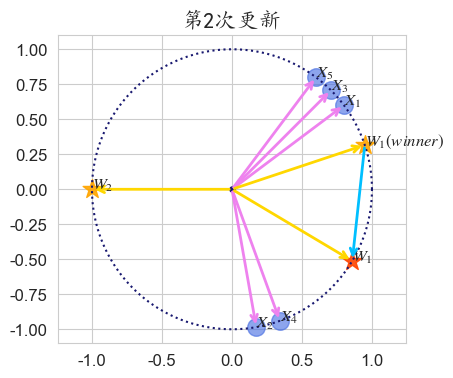


Epoch 3:

当前输入的训练数据 X3:  [0.70710678 0.70710678]

第1个神经元获胜，更新权向量 W1: [0.9923145  0.12374136]

权向量角度: W1(7.11),W2(180.00)


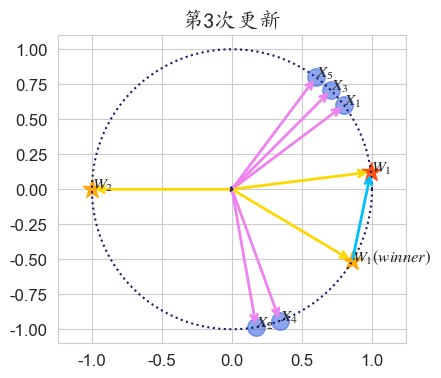


Epoch 4:

当前输入的训练数据 X4:  [ 0.34199998 -0.93969996]

第1个神经元获胜，更新权向量 W1: [ 0.85312698 -0.52170332]

权向量角度: W1(-31.45),W2(180.00)


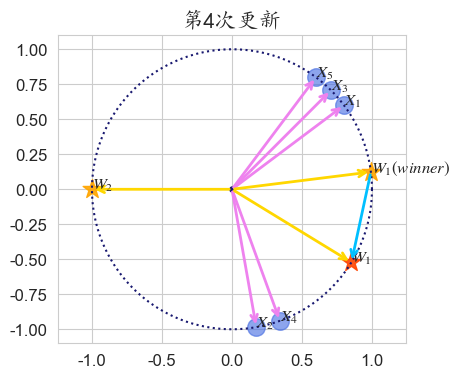


Epoch 5:

当前输入的训练数据 X5:  [0.6 0.8]

第1个神经元获胜，更新权向量 W1: [0.98215041 0.18809726]

权向量角度: W1(10.84),W2(180.00)


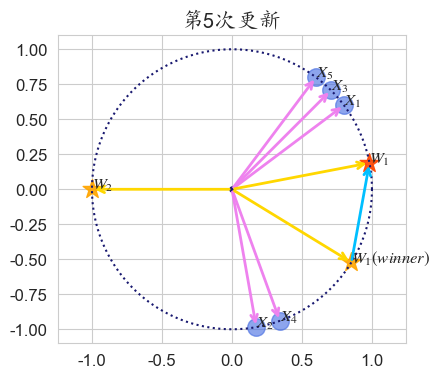


Epoch 6:

当前输入的训练数据 X1:  [0.8 0.6]

第1个神经元获胜，更新权向量 W1: [0.91456601 0.40443666]

权向量角度: W1(23.86),W2(180.00)


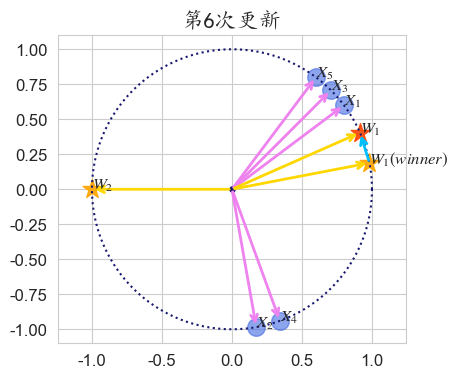


Epoch 7:

当前输入的训练数据 X2:  [ 0.17360278 -0.98481576]

第2个神经元获胜，更新权向量 W2: [-0.64280527 -0.76602963]

权向量角度: W1(23.86),W2(-130.00)


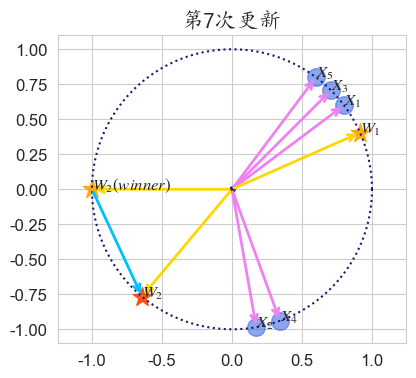


Epoch 8:

当前输入的训练数据 X3:  [0.70710678 0.70710678]

第1个神经元获胜，更新权向量 W1: [0.82483814 0.56536894]

权向量角度: W1(34.43),W2(-130.00)


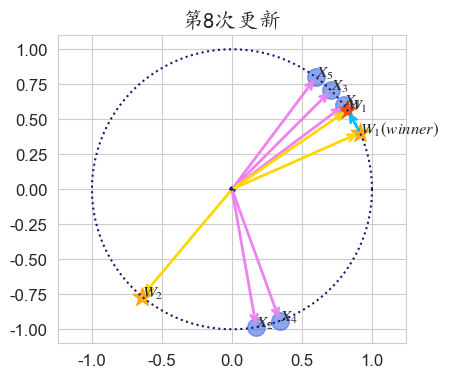


权向量角度变化：
第1次迭代： W1(0.00),  W2(180.00)
第2次迭代： W1(18.43),  W2(180.00)
第3次迭代： W1(-30.78),  W2(180.00)
第4次迭代： W1(7.11),  W2(180.00)
第5次迭代： W1(-31.45),  W2(180.00)
第6次迭代： W1(10.84),  W2(180.00)
第7次迭代： W1(23.86),  W2(180.00)
第8次迭代： W1(23.86),  W2(-130.00)
第9次迭代： W1(34.43),  W2(-130.00)


In [4]:
X = np.array([[0.8,0.6],[0.1736,-0.9848],[0.707,0.707],[0.342,-0.9397],[0.6,0.8]])
classnum = 2
init_W = np.array([[1,0],[-1,0]]).T
lr = 0.5
epochs = 8
draw_flag = 1
weights,w_theta = runner_2d(X,classnum,lr=lr,epochs=epochs,init_W=init_W,draw_flag=draw_flag)
print('\n权向量角度变化：')
for i,w in enumerate(w_theta):
    print('第{:d}次迭代： W1({:.2f}),  W2({:.2f})'.format(i+1,w[0],w[1]))